# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

In [1]:
# Generate sample Data of 10 colours 
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[0.98590971, 0.13616059, 0.58981611],
       [0.84489241, 0.9931208 , 0.81998964],
       [0.16203105, 0.23488775, 0.98949612],
       [0.45494857, 0.48735677, 0.87896296],
       [0.41660618, 0.29978855, 0.20624588],
       [0.05893632, 0.71106881, 0.77401571],
       [0.14596078, 0.09202083, 0.08557581],
       [0.74328869, 0.92252471, 0.35203201],
       [0.17631706, 0.84609895, 0.22159417],
       [0.99186991, 0.9659793 , 0.35367983]])

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [2]:
# Implement the network...
class SOM:
    '''
    Create a self organising map of size (width x height)  
    
    '''
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.init_radius = max(self.width,self.height)/2
        self.node_weights = None
        self.lambda_val = None
        self.init_lr = None
        self.trained = False
        self.sum_dict = {}
        self.opt = 0
        
    
    def _populateSumDict(self):
        for x in range(self.width):
            for y in range(self.height):
                self.sum_dict[(x, y)] = np.sqrt(x**2 + y**2)
        
    def fit(self, input_data, n_iters = 100, learning_rate = 0.1, opt = 0):
        '''
        Train the self organising map with the input data which is of the form (n x m) 
        where n = number of training examples
              m = dimension/features of each training example
        
        Parameters:
            input_data : input data 
            n_iters : number of iterations for which the training happens
            learning_rate : learning rate of the algorithm (default value = 0.1) and gets 
                            exponentially decayed with each iteration
            opt : optimization level for performance. Valid values are 0, 1, 2 and 3 which 
                  signify levels of optimizations
        '''
        #precompute the euclidean distance between nodes
        self.opt = opt
        if self.opt > 0 and self.opt < 3:
            self._populateSumDict()
            
        #compute lambda and set initial learning rate
        self.lambda_val = n_iters/np.log(self.init_radius)
        self.init_lr = learning_rate
        
        #number of training samples
        self.n = input_data.shape[0]
        #dimension or number of features in each training sample vector
        self.m = input_data.shape[1]
        
        #generate node weights randomly from uniform distribution between [0,1]
        self.node_weights = np.random.random((self.width, self.height, self.m))
               
        #start training
        for i in range(n_iters):
            
            # 1. Randomly select a current input vector 
            current_input = input_data[np.random.randint(0,self.n), :].reshape(np.array([self.m, 1]))
            
            # 2. Get BMU for this input vector
            bmu, bmu_idx = self._findBMU(current_input)
            
            # 3. Decay radius and learning rate
            r = self._decayRadius(i)
            lr = self._decayLearningRate(i)
            
            # 4. Update the neighborhood
            self._updateNeighborhood(current_input, bmu_idx, r, lr)
            
            
        #training complete                    
        self.trained = True
    
           
    def getMapWeights(self):
        '''
        Return the weights of the nodes after training has finished
        '''
        if self.trained:
            return self.node_weights
        raise Exception("The SOM has not been trained yet. Run 'fit' method to train it")
    
    def reset(self):
        '''
        Reset the trained map. However the size of the map does not change
        '''
        self.node_weights = None
        self.lambda_val = None
        self.init_lr = None
        self.trained = False
        self.sum_dict = {}
                
    def _updateNeighborhood(self, current_input, bmu_idx, r, lr):
        
        r_square = r**2
        if self.opt > 2:
            #generate 2D index array
            idx_arr = np.indices((self.node_weights.shape[0], self.node_weights.shape[1])).transpose(1,2,0)
            #vectorized computation
            w_dist_arr = np.sqrt(np.sum((idx_arr - bmu_idx) ** 2, axis=2))
            
            # get all the indexes where the distance is within the radius
            idx_arr_to_update = np.argwhere(w_dist_arr <= r)
            
            # update weights for the fitered 2D indices
            for x,y in idx_arr_to_update:
                    self._updateWeights(current_input, w_dist_arr[x][y], x, y, lr, r_square)
                                                                
        else:
            #update the neighborhood of the node located at bmu_idx
            for x in range(self.node_weights.shape[0]):
                for y in range(self.node_weights.shape[1]):

                    if self.opt > 0: 
                        k1 = abs(np.array([x, y]) - bmu_idx)[0]
                        k2 = abs(np.array([x, y]) - bmu_idx)[1]
                        w_dist = self.sum_dict[(k1,k2)]
                                            
                    else:
                        # Get the euclidean distance
                        w_dist = np.sqrt(np.sum((np.array([x, y]) - bmu_idx) ** 2))
                    
                        
                    # Only update if the distance is within the current neighbourhood radius
                    if w_dist <= r:
                        self._updateWeights(current_input, w_dist, x, y, lr, r_square)
                                                
    
    def _updateWeights(self, current_input, w_dist, x, y, lr, r_square):
        #update the weights of the node indexed at x,y
        
        # Find weight vector
        w = self.node_weights[x, y, :].reshape(self.m, 1)
                    
        # Calculate the degree of influence (based on the 2-D distance)
        influence = self._getInfluence(w_dist, r_square)

        # Update weight:
        new_w = w + (lr * influence * (current_input - w))

        # Update node with new weight
        self.node_weights[x, y, :] = new_w.reshape(1, self.m)
        
        
    def _findBMU(self, current_input):
        #return the BMU node for the given input vector
        #The BMU node is the one with minimum distance from the input vector
        #also return the 2D index in the map of that BMU  
        
        if self.opt > 1:
            
            # use vectorized computation and numpy broadcasting to
            # speed up the operation of 
            # computing distance between each node and the 
            # current_input vector
            diff_arr = np.sum(((self.node_weights - current_input.flatten())**2), axis=2)
            arg_min = np.argmin(diff_arr)
            x = arg_min // self.node_weights.shape[0]
            y = arg_min % self.node_weights.shape[1]
            bmu_idx = (x, y)
        
        else:
        
            # a tuple to contain x and y coordinates
            # of the BMU for the current input vector
            bmu_idx = (0,0)

            # Set the initial minimum difference to max int value
            min_diff = np.iinfo(np.int).max

 
            for x in range (self.node_weights.shape[0]):
                for y in range(self.node_weights.shape[1]):
                    w = self.node_weights[x,y,:].reshape(self.m, 1)
                
                    if self.opt > 0:
                        #avoid sqrt as we are simply comparing distances
                        diff = np.sum((w - current_input) ** 2)
                
                    else:
                        #euclidean distance
                        diff = np.sqrt(np.sum((w - current_input) ** 2))
                
                
                    #set min_diff if diff is less than min_diff so far
                    #also set the bmu 2D index 
                    if (diff < min_diff):
                        min_diff = diff
                        bmu_idx = (x, y)
                    
        
        bmu = self.node_weights[bmu_idx[0], bmu_idx[1], :].reshape(self.m, 1)

        return bmu, np.asarray(bmu_idx)
    
    def _decayRadius(self, iter_num):
        # decay the radius exponentially based on given iteration
        # and initial radius and constant lambda value
        return self.init_radius * np.exp(-iter_num / self.lambda_val)
    
    def _decayLearningRate(self, iter_num):
        # decay the learning rate exponentially based on given iteration
        # and initial learning rate and constant lambda value
        return self.init_lr * np.exp(-iter_num / self.lambda_val)
    
    def _getInfluence(self, distance, radius_square):
        # generate the influence based on the given distance
        # and the current radius(which is determined by the current iteration)
        return np.exp(-(distance**2) / (2* (radius_square)))
        
        
    def genImage(self):
        '''
        Create an RGB image using the node weight matrix.

        node weights will be scaled to lie in [lower, upper], where
        lower (upper) is the global lower (upper) bound of all values in each of the
        dimension of node_weight matrix

        Returns an Image object
        '''
        upper = -np.inf
        lower = np.inf
        layers = (0, 1, 2)
        for i in layers:
            v = self.node_weights[:, :, i]
            lower = min(lower, v.min())
            upper = max(upper, v.max())
        
        from PIL import Image
        ratios = (self.node_weights - lower) / (upper - lower)
        img = Image.fromarray(np.array(256 * ratios, np.uint8), 'RGB')
        img.lower_bound = lower
        img.upper_bound = upper
        return img
        
        

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?



In [3]:
import matplotlib.pyplot as plt

In [4]:
input_data = np.random.random((20,3))
#create a 10x10 network
som = SOM(10, 10)

In [5]:
%time som.fit(input_data, n_iters=500)

CPU times: user 952 ms, sys: 23.9 ms, total: 976 ms
Wall time: 925 ms


In [6]:
#Get the trained node weights
#trained_map = som.getMap()
image_data = som.genImage()

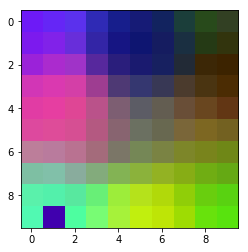

In [7]:
#The 10x10 SOM after 500 iterations
plt.imshow(image_data)

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?



In [8]:
#create a 100x100 network
som_100 = SOM(100, 100)
%time som_100.fit(input_data, n_iters=1000)

CPU times: user 3min 7s, sys: 27.9 ms, total: 3min 7s
Wall time: 3min 7s


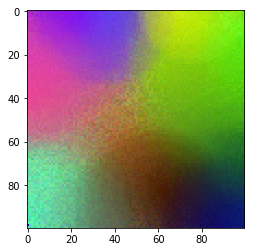

In [9]:
image_data_100 = som_100.genImage()
plt.imshow(image_data_100)

### Lets profile the code to see which functions are consuming the most time
#### Take a 100x100 map and run it for 100 iterations


In [10]:
import profile
profile.run('input_data=np.random.random((20,3)); som = SOM(100,100); \
             som.fit(input_data, n_iters=100);print')

         20318893 function calls in 89.112 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000200    3.309    0.000    3.309    0.000 :0(array)
        1    0.000    0.000   89.112   89.112 :0(exec)
  2000000    6.563    0.000   50.836    0.000 :0(implement_array_function)
  2000000    3.251    0.000    3.251    0.000 :0(isinstance)
      300    0.001    0.000    0.001    0.000 :0(issubclass)
  2000000    3.184    0.000    3.184    0.000 :0(items)
        1    0.000    0.000    0.000    0.000 :0(max)
      100    0.003    0.000    0.007    0.000 :0(randint)
        2    0.002    0.001    0.002    0.001 :0(random)
  2000000    9.334    0.000    9.334    0.000 :0(reduce)
  1158692    2.578    0.000    2.578    0.000 :0(reshape)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
  2000000    8.918    0.000   62.504    0.000 <__array_function__ internals>:2(sum)
    79246    0.985    0.000    1.678    0.000 <ipytho

#### Profiling shows that a lot of time is being spent in function sum which is being called 2M times!
One optimization that can be done is to precompute the computation done at 'Update Neighborhood' step.
Here a simple distance between nodes is being computed again & again. 
This information can be precomputed at the beginning for the entire 2D array
In the code populateSumDict() function does this and uses this info during the 'Update Neighborhood' step.

In [11]:
#Lets profile the code again with this optimization which is turned on with opt = 1 value
profile.run('input_data=np.random.random((20,3)); som = SOM(100,100); \
             som.fit(input_data, n_iters=100, opt=1);print')

         14270518 function calls in 63.410 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2000000    4.503    0.000    4.503    0.000 :0(abs)
  2000200    5.447    0.000    5.447    0.000 :0(array)
        1    0.000    0.000   63.410   63.410 :0(exec)
  1000000    3.300    0.000   25.523    0.000 :0(implement_array_function)
  1000000    1.632    0.000    1.632    0.000 :0(isinstance)
      300    0.001    0.000    0.001    0.000 :0(issubclass)
  1000000    1.593    0.000    1.593    0.000 :0(items)
        1    0.000    0.000    0.000    0.000 :0(max)
      100    0.003    0.000    0.007    0.000 :0(randint)
        2    0.000    0.000    0.000    0.000 :0(random)
  1000000    4.733    0.000    4.733    0.000 :0(reduce)
  1134504    2.434    0.000    2.434    0.000 :0(reshape)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
  1000000    4.436    0.000   31.341    0.000 <__array_function__ internals>:2(sum)

#### The optimization results in 50% less sum calls. There are 1M sum calls now


#### _findBMU() function takes 2/3 of the total time. This function can be optimized by utilizing vectorized computation to compute the np.sum() for the entire 2D node map in parallel. This is enabled through opt = 2


In [12]:
#Lets profile the code again with this optimization which is turned on with opt = 2 value
profile.run('input_data=np.random.random((20,3)); som = SOM(100,100); \
             som.fit(input_data, n_iters=100, opt=2);print')

         4288442 function calls in 22.293 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2000000    4.383    0.000    4.383    0.000 :0(abs)
      100    0.001    0.000    0.001    0.000 :0(argmin)
  2000200    5.371    0.000    5.371    0.000 :0(array)
        1    0.000    0.000   22.293   22.293 :0(exec)
      100    0.001    0.000    0.001    0.000 :0(flatten)
      100    0.000    0.000    0.000    0.000 :0(getattr)
      200    0.001    0.000    0.018    0.000 :0(implement_array_function)
      100    0.000    0.000    0.000    0.000 :0(isinstance)
      300    0.001    0.000    0.001    0.000 :0(issubclass)
      100    0.000    0.000    0.000    0.000 :0(items)
        1    0.000    0.000    0.000    0.000 :0(max)
      100    0.003    0.000    0.006    0.000 :0(randint)
        2    0.001    0.000    0.001    0.000 :0(random)
      100    0.012    0.000    0.012    0.000 :0(reduce)
   142716    0.296    0.000   

In [13]:
#Let's run for full 1000 iterations 
som_100_opt = SOM(100, 100)
%time som_100_opt.fit(input_data, n_iters=1000,  opt=2)

CPU times: user 50.4 s, sys: 27.1 ms, total: 50.4 s
Wall time: 50.4 s


#### So with couple of optimizations the runtime has reduced to 50.4s from 187s which is almost 4X speed up!!
#### Now the bottleneck function is _updateNeighborhood. We can try to vectorize that as well. This is enabled through opt = 3

In [14]:
#Lets profile the code again with this optimization which is turned on with opt = 2 value
profile.run('input_data=np.random.random((20,3)); som = SOM(100,100); \
             som.fit(input_data, n_iters=100, opt=3);print')

         272542 function calls (272342 primitive calls) in 1.521 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      200    0.001    0.000    0.001    0.000 :0(arange)
      100    0.001    0.000    0.001    0.000 :0(argmin)
      300    0.001    0.000    0.001    0.000 :0(array)
      100    0.000    0.000    0.000    0.000 :0(empty)
        1    0.000    0.000    1.521    1.521 :0(exec)
      100    0.000    0.000    0.000    0.000 :0(flatten)
      400    0.001    0.000    0.001    0.000 :0(getattr)
  600/400    0.002    0.000    0.028    0.000 :0(implement_array_function)
      200    0.000    0.000    0.000    0.000 :0(isinstance)
      300    0.001    0.000    0.001    0.000 :0(issubclass)
      200    0.000    0.000    0.000    0.000 :0(items)
      100    0.000    0.000    0.000    0.000 :0(len)
        1    0.000    0.000    0.000    0.000 :0(max)
      100    0.002    0.000    0.002    0.000 :0(nonzero)
      10

In [15]:
#Let's run for full 1000 iterations 
som_100_opt = SOM(100, 100)
%time som_100_opt.fit(input_data, n_iters=1000,  opt=3)

CPU times: user 5.08 s, sys: 15.3 ms, total: 5.1 s
Wall time: 5.08 s


#### This results in a speed up of  ~40X !! From 187s to 5s

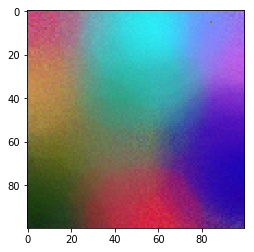

In [16]:
#plot the trained network
image_data_100_opt = som_100_opt.genImage()
plt.imshow(image_data_100_opt)

In [17]:
#Let's run for  5000 iterations 
som_100_opt = SOM(100, 100)
%time som_100_opt.fit(input_data, n_iters=5000,  opt=3)

CPU times: user 24 s, sys: 28.8 ms, total: 24.1 s
Wall time: 24 s


#### It is scaling linearly too as the time taken in executing 5000 iterations is almost 5 times the time taken for 1000 iterations

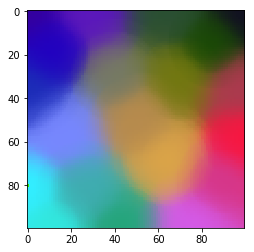

In [19]:
#much smoother image obtained after training for 5000 iterations
image_data_opt = som_100_opt.genImage()
plt.imshow(image_data_opt)
